# 퍼셉트론 (Perceptron)
- 퍼셉트론은 논리 게이트를 모방할 수 있는 인공 신경망의 한 종류이다.
- 가중치와 편향을 통해 논리 게이트와 같은 동작을 한다.

In [1]:
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def activate(self,x): # perceptron 연산
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0 # 내적        

In [3]:
test_case = [(0,0),(0,1),(1,0),(1,1)]

In [25]:
AND_gate = Perceptron(weights=[0.5,0.5], bias=-0.7)

for test in test_case:
    print(f'input: {test} | oupt : {AND_gate.activate(test)}')

input: (0, 0) | oupt : 0
input: (0, 1) | oupt : 0
input: (1, 0) | oupt : 0
input: (1, 1) | oupt : 1


In [8]:
OR_gate = Perceptron(weights=[0.5,0.5], bias = -0.2)

for test in test_case:
    print("Input:",test,"Output:",OR_gate.activate(test))

Input: (0, 0) Output: 0
Input: (0, 1) Output: 1
Input: (1, 0) Output: 1
Input: (1, 1) Output: 1


In [24]:
NAND_gate = Perceptron(weights=[-0.5,-0.5], bias = 0.7)

for test in test_case:
    print("Input:",test,"Output:",NAND_gate.activate(test))


Input: (0, 0) Output: 1
Input: (0, 1) Output: 1
Input: (1, 0) Output: 1
Input: (1, 1) Output: 0


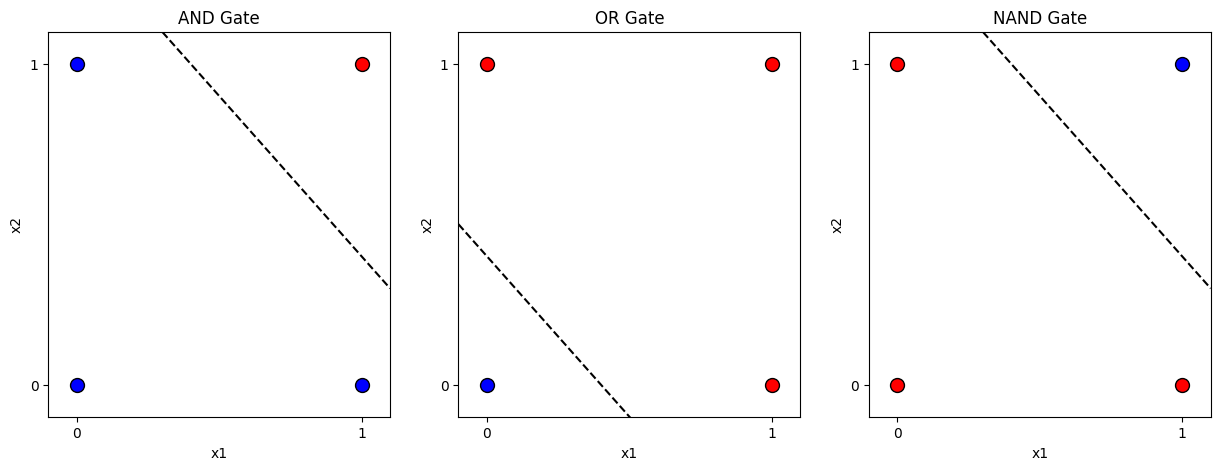

In [26]:
# 시각화
import matplotlib.pyplot as plt
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

gates = {
    'AND' : AND_gate,
    'OR' : OR_gate,
    'NAND' : NAND_gate
}

fit,axes = plt.subplots(1,3, figsize=(15,5))

for idx, (gate_name, perceptron) in enumerate(gates.items()):
    ax = axes[idx]
    outputs = np.array([perceptron.activate(x) for x in inputs])
    
    for (x1,x2),y in zip(inputs,outputs):
        ax.scatter(x1,x2,c='red' if y==1 else 'blue', s = 100, edgecolor='black' )
        
    x_vals = np.linspace(-0.1,1.1,100)
    y_vals = \
        (-perceptron.weights[0] * x_vals - perceptron.bias) / perceptron.weights[1]
    ax.plot(x_vals,y_vals,'k--')
    
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_title(f'{gate_name} Gate')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    
plt.show()

# XOR gate

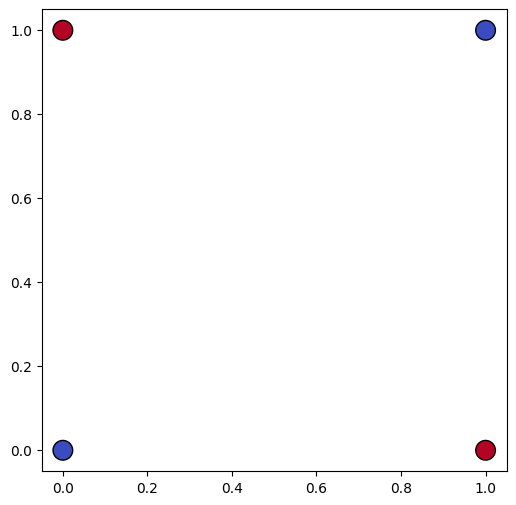

In [27]:
# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# 시각화
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1], c=y, s=200, edgecolors='black', cmap='coolwarm')
plt.show()

# 다층 퍼셉트론 (Multi-Layer Perceptron, MLP)

In [30]:
def XOR_gate(x1,x2):
    nand_out = NAND_gate.activate([x1,x2])
    or_out = OR_gate.activate([x1,x2])
    return  AND_gate.activate([nand_out,or_out])

In [32]:
for x1,x2 in test_case:
    print("Input:",x1,x2,"| Output:",XOR_gate(x1,x2))

Input: 0 0 | Output: 0
Input: 0 1 | Output: 1
Input: 1 0 | Output: 1
Input: 1 1 | Output: 0


In [35]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

mlp = MLPClassifier(
    hidden_layer_sizes=(4,4),    #은닉층 크기
    activation='relu',          # 활성화 함수
    solver='adam',              # 가중치 업데이트 방식(최적화 알고리즘)
    max_iter=1000,              # 모델의 학습 반복 횟수(epoch)
    random_state=42             # 가중치 초기화 값 고정
)
mlp.fit(X,y)

pred = mlp.predict(X)
for i in range(4):
    print(f'XOR({X[i][0]},{X[i][1]}) = {pred[i]}')


XOR(0,0) = 0
XOR(0,1) = 1
XOR(1,0) = 1
XOR(1,1) = 0


c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

hidden_layers = [(1,),(2,),(4,),(8,)]

for config in hidden_layers:
    mlp = MLPClassifier(
        hidden_layer_sizes=config,    #은닉층 크기
        activation='relu',          # 활성화 함수
        solver='adam',              # 가중치 업데이트 방식(최적화 알고리즘)
        max_iter=1000,              # 모델의 학습 반복 횟수(epoch)
        random_state=42             # 가중치 초기화 값 고정
    )
    mlp.fit(X,y)

    pred = mlp.predict(X)
    print(f'은닉층 구조 {config} -> XOR 예측 결과 : {pred}')
    

은닉층 구조 (1,) -> XOR 예측 결과 : [0 1 0 1]
은닉층 구조 (2,) -> XOR 예측 결과 : [1 1 1 1]
은닉층 구조 (4,) -> XOR 예측 결과 : [0 0 0 0]
은닉층 구조 (8,) -> XOR 예측 결과 : [0 1 1 0]


c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
